In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
 #%%

# google colab configurations 
# these might change

# torch imports
import torch

# import utils
import json
from datetime import date
import os

google_colab = input('Running on Colab?\n')
if google_colab=='yes' : 

    from pydrive.auth import GoogleAuth
    from pydrive.drive import GoogleDrive
    from google.colab import auth
    from oauth2client.client import GoogleCredentials

    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)


    COLAB_CONFIG = '1o5nZNVmNBq3UQRxwYIwOATX0c0GyHPRN'
    COLAB_CONFIG_FILE ='colab_config.json'

    colab_json = drive.CreateFile({'id': COLAB_CONFIG})
    colab_json.GetContentFile(COLAB_CONFIG_FILE)

    with open(COLAB_CONFIG_FILE) as f:
        temp = f.read()
    colab_config = json.loads(temp)

    for key in colab_config:
        globals()[key] = drive.CreateFile({"id":colab_config[key]['id']})
        globals()[key].GetContentFile(colab_config[key]['file'])

    from trainer import RegressionTrainer
    from datageneration import DataGenerator
    from helpers import Helper, Plotter
    
else:
    import sys, os 
    BASE_DIR = '/'.join(os.getcwd().split('/')[:-1])
    sys.path.append(BASE_DIR)
    print(f'Top level directory is set to {BASE_DIR}')

    # custom imports
    from cnp.trainer import RegressionTrainer
    from cnp.datageneration import DataGenerator
    from cnp.helpers import Helper

Running on Colab?

Top level directory is set to /Users/frederik/Google Drive/University/UC3M/TFM/cnp_repo/neural-processes


In [11]:

# we first get the variables for the configuration file
os.environ["CHECKPOINT_DIR"] = "checkpoints"
os.environ["MODEL_PARAMS"] = "default"

CHECKPOINT_DIR = os.environ['CHECKPOINT_DIR']
MODEL_PARAMS = os.environ['MODEL_PARAMS']

if google_colab=='yes':
    config_dir = ''
else:
    config_dir = os.path.join(BASE_DIR,'configs')

with open(os.path.join(config_dir,'arch_imp.json')) as f:
    file = f.read()
    default_conf = json.loads(file)



In [12]:

# checking whether CUDA is available 
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
    default_conf['multiple_functions']['experiment_params']['train_on_gpu'] = True
else: 
    print('No GPU available, training on CPU')
    default_conf['multiple_functions']['experiment_params']['train_on_gpu'] = False

No GPU available, training on CPU


## Generating data on the fly from a simple function.

In [13]:
# creating an instance of to orchestrate the training
trainer = RegressionTrainer(**default_conf['multiple_functions']['experiment_params'])

  0%|          | 0/10000 [00:00<?, ?it/s]

Mean loss at epoch 0 : 2.8484301567077637
 Validation loss after 0 equals                     3.461610794067383


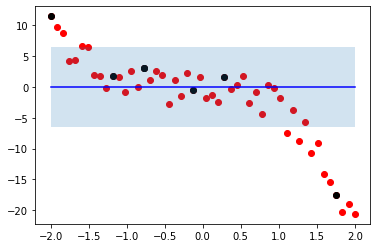

  1%|          | 69/10000 [00:00<12:44, 12.99it/s]

Mean loss at epoch 100 : 4.111403942108154
 Validation loss after 100 equals                     2.880429983139038


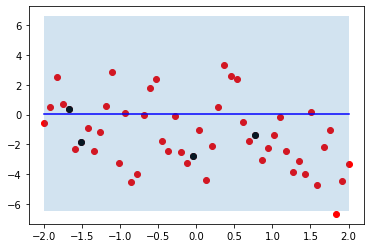

  2%|▏         | 194/10000 [00:00<03:29, 46.85it/s]

Mean loss at epoch 200 : 3.2493059635162354
 Validation loss after 200 equals                     3.1222598552703857


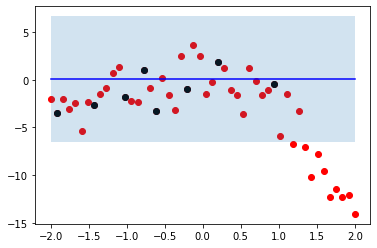

  3%|▎         | 282/10000 [00:01<01:43, 94.16it/s]

Mean loss at epoch 300 : 3.2914795875549316
 Validation loss after 300 equals                     3.502863883972168


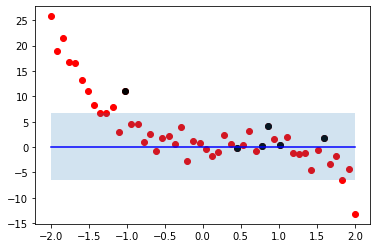

  4%|▍         | 379/10000 [00:01<01:02, 153.46it/s]

Mean loss at epoch 400 : 3.8730432987213135
 Validation loss after 400 equals                     3.2100343704223633


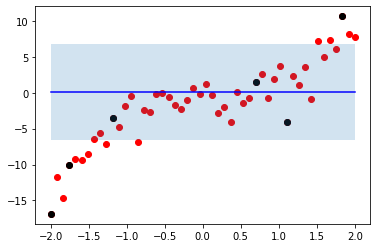

  5%|▍         | 479/10000 [00:02<00:45, 207.37it/s]

Mean loss at epoch 500 : 3.554922103881836
 Validation loss after 500 equals                     3.8660361766815186


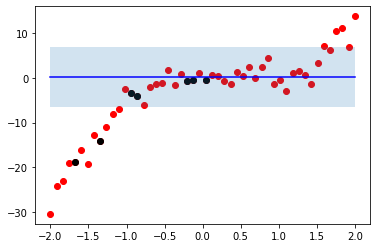

  6%|▌         | 581/10000 [00:02<00:39, 236.89it/s]

Mean loss at epoch 600 : 2.914821147918701
 Validation loss after 600 equals                     2.986645221710205


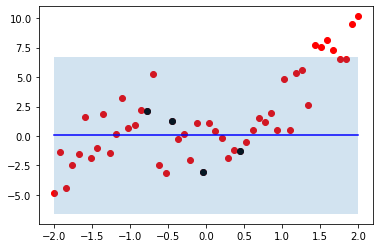

  7%|▋         | 681/10000 [00:03<00:37, 245.40it/s]

Mean loss at epoch 700 : 3.443557024002075
 Validation loss after 700 equals                     3.1521224975585938


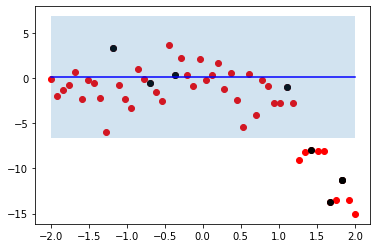

  8%|▊         | 792/10000 [00:03<00:40, 227.89it/s]

Mean loss at epoch 800 : 3.249617338180542
 Validation loss after 800 equals                     2.9832358360290527


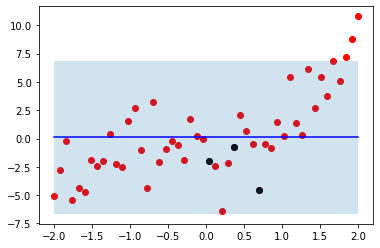

  9%|▊         | 872/10000 [00:04<00:48, 186.97it/s]

Mean loss at epoch 900 : 2.8885385990142822
 Validation loss after 900 equals                     3.246330499649048


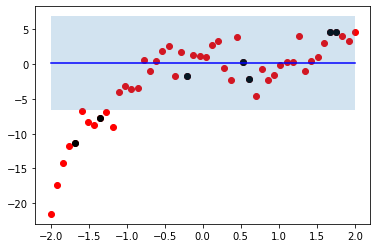

 10%|█         | 1000/10000 [00:04<00:37, 242.79it/s]

Mean loss at epoch 1000 : 3.0474915504455566
 Validation loss after 1000 equals                     3.143312692642212


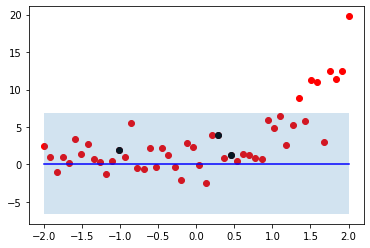

 11%|█         | 1067/10000 [00:05<00:41, 213.33it/s]

Mean loss at epoch 1100 : 2.9409048557281494
 Validation loss after 1100 equals                     3.1920647621154785


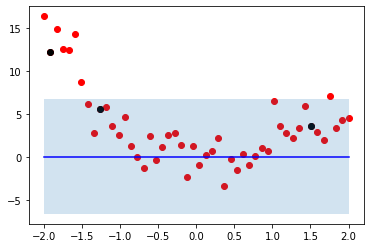

 12%|█▏        | 1174/10000 [00:05<00:35, 250.72it/s]

Mean loss at epoch 1200 : 2.918841600418091
 Validation loss after 1200 equals                     3.039019823074341


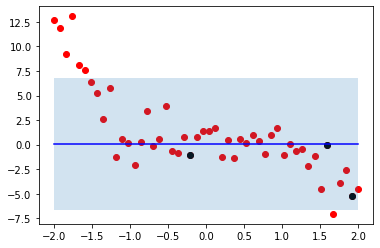

 13%|█▎        | 1279/10000 [00:06<00:33, 257.43it/s]

Mean loss at epoch 1300 : 3.0249805450439453
 Validation loss after 1300 equals                     3.2709238529205322


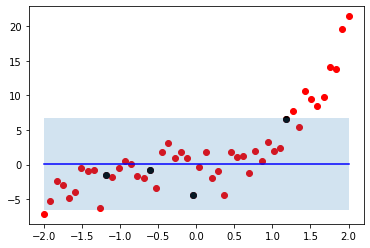

 14%|█▍        | 1380/10000 [00:06<00:35, 242.64it/s]

Mean loss at epoch 1400 : 3.7311105728149414
 Validation loss after 1400 equals                     3.3257148265838623


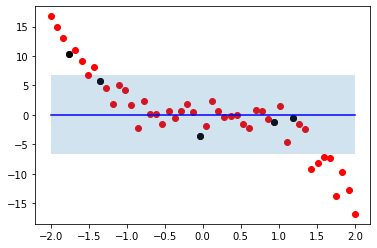

 15%|█▍        | 1485/10000 [00:06<00:33, 255.46it/s]

Mean loss at epoch 1500 : 3.083981513977051
 Validation loss after 1500 equals                     3.0264334678649902


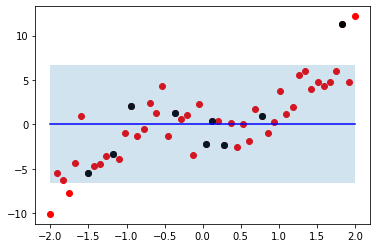

 16%|█▌        | 1589/10000 [00:07<00:34, 246.19it/s]

Mean loss at epoch 1600 : 3.333970308303833
 Validation loss after 1600 equals                     3.6763973236083984


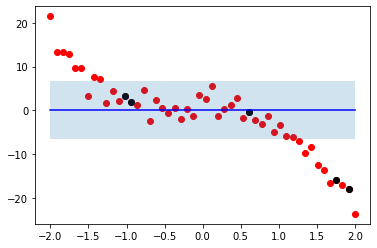

 17%|█▋        | 1682/10000 [00:07<00:34, 241.24it/s]

Mean loss at epoch 1700 : 3.5329525470733643
 Validation loss after 1700 equals                     3.0410385131835938


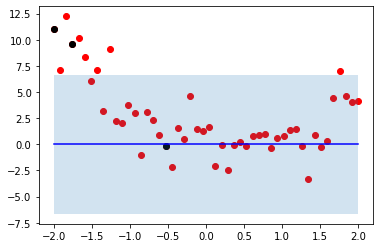

 18%|█▊        | 1778/10000 [00:08<00:38, 211.44it/s]

Mean loss at epoch 1800 : 3.068946123123169
 Validation loss after 1800 equals                     3.313112735748291


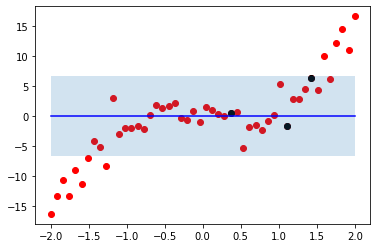

 19%|█▊        | 1865/10000 [00:08<00:37, 215.93it/s]

Mean loss at epoch 1900 : 3.143195390701294
 Validation loss after 1900 equals                     4.015318393707275


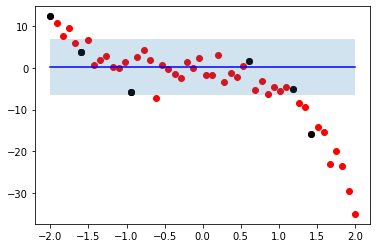

 20%|█▉        | 1990/10000 [00:09<00:33, 236.46it/s]

Mean loss at epoch 2000 : 3.3370532989501953
 Validation loss after 2000 equals                     3.4814417362213135


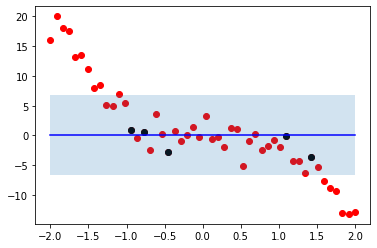

 21%|██        | 2086/10000 [00:09<00:33, 233.93it/s]

Mean loss at epoch 2100 : 2.9180748462677
 Validation loss after 2100 equals                     2.9432272911071777


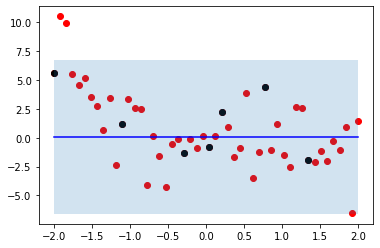

 22%|██▏       | 2191/10000 [00:10<00:35, 220.67it/s]

Mean loss at epoch 2200 : 3.1823294162750244
 Validation loss after 2200 equals                     3.1265764236450195


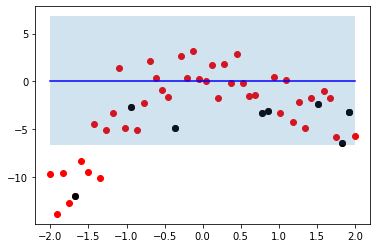

 23%|██▎       | 2289/10000 [00:10<00:35, 220.04it/s]

Mean loss at epoch 2300 : 2.959789991378784
 Validation loss after 2300 equals                     3.518352746963501


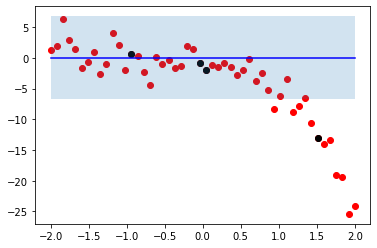

 24%|██▍       | 2380/10000 [00:11<00:33, 225.80it/s]

Mean loss at epoch 2400 : 3.1331818103790283
 Validation loss after 2400 equals                     3.8885974884033203


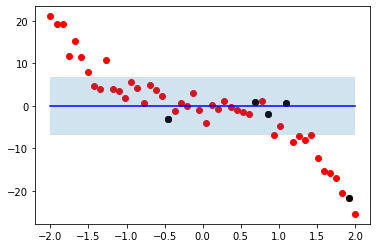

 25%|██▍       | 2476/10000 [00:11<00:32, 231.27it/s]

Mean loss at epoch 2500 : 3.435941219329834
 Validation loss after 2500 equals                     3.073463201522827


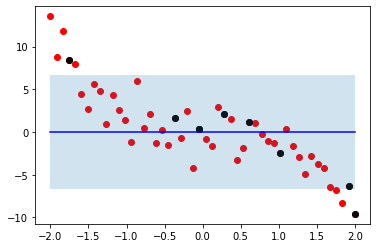

 26%|██▌       | 2598/10000 [00:12<00:30, 245.01it/s]

Mean loss at epoch 2600 : 3.284421443939209
 Validation loss after 2600 equals                     3.9525623321533203


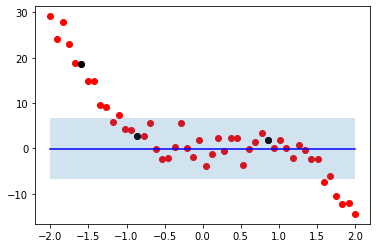

 27%|██▋       | 2697/10000 [00:12<00:31, 235.37it/s]

Mean loss at epoch 2700 : 3.0650503635406494
 Validation loss after 2700 equals                     3.0163638591766357


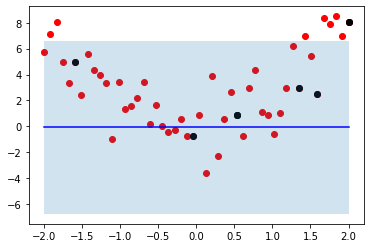

 28%|██▊       | 2785/10000 [00:13<00:32, 223.54it/s]

Mean loss at epoch 2800 : 2.998243808746338
 Validation loss after 2800 equals                     3.0490479469299316


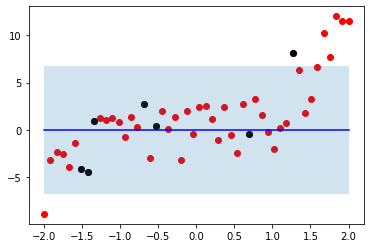

 29%|██▉       | 2899/10000 [00:13<00:31, 228.86it/s]

Mean loss at epoch 2900 : 3.851494789123535
 Validation loss after 2900 equals                     3.7455170154571533


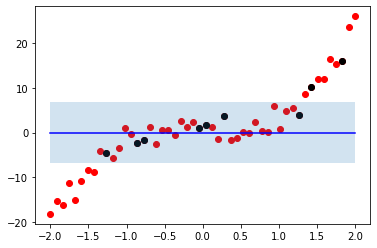

 30%|██▉       | 2994/10000 [00:14<00:29, 237.53it/s]

Mean loss at epoch 3000 : 2.992666721343994
 Validation loss after 3000 equals                     3.5673065185546875


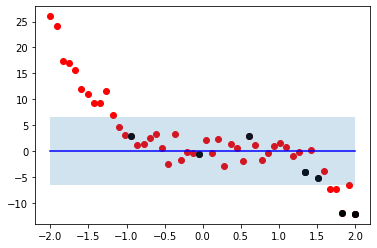

 31%|███       | 3094/10000 [00:14<00:32, 210.19it/s]

Mean loss at epoch 3100 : 3.123701810836792
 Validation loss after 3100 equals                     3.4067797660827637


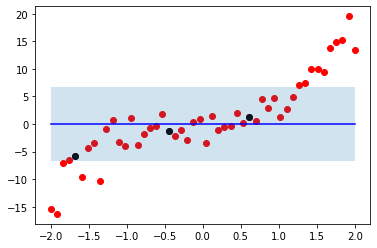

 32%|███▏      | 3175/10000 [00:15<00:33, 201.59it/s]

Mean loss at epoch 3200 : 3.753255605697632
 Validation loss after 3200 equals                     3.495485305786133


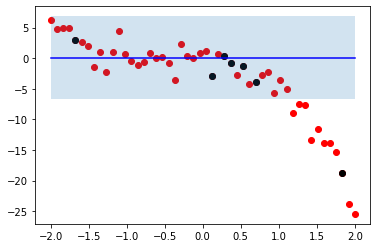

 33%|███▎      | 3293/10000 [00:15<00:30, 222.01it/s]

Mean loss at epoch 3300 : 3.3741207122802734
 Validation loss after 3300 equals                     2.9800827503204346


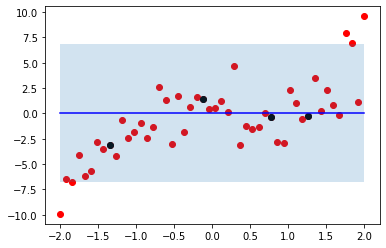

 34%|███▍      | 3396/10000 [00:16<00:27, 238.35it/s]

Mean loss at epoch 3400 : 2.8657937049865723
 Validation loss after 3400 equals                     3.196230411529541


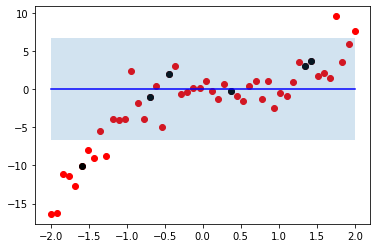

 35%|███▍      | 3493/10000 [00:16<00:27, 238.16it/s]

Mean loss at epoch 3500 : 2.9220452308654785
 Validation loss after 3500 equals                     3.3219873905181885


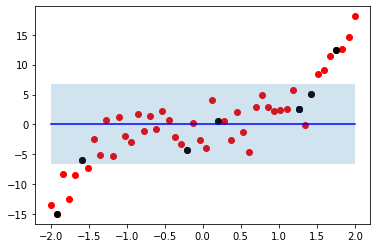

 36%|███▌      | 3598/10000 [00:17<00:25, 253.20it/s]

Mean loss at epoch 3600 : 2.95596981048584
 Validation loss after 3600 equals                     3.0898947715759277


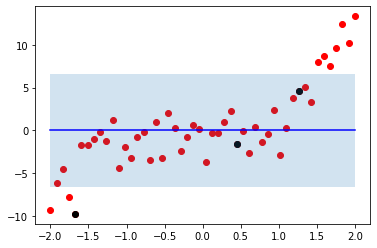

 37%|███▋      | 3688/10000 [00:17<00:26, 240.19it/s]

Mean loss at epoch 3700 : 3.93708872795105
 Validation loss after 3700 equals                     3.083775043487549


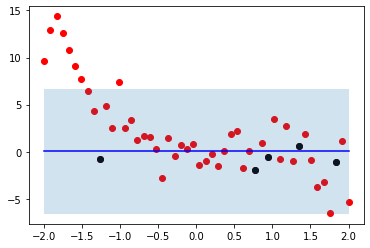

 38%|███▊      | 3793/10000 [00:18<00:24, 253.30it/s]

Mean loss at epoch 3800 : 3.2082135677337646
 Validation loss after 3800 equals                     3.204782724380493


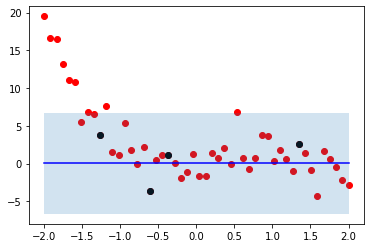

 39%|███▉      | 3899/10000 [00:18<00:23, 263.21it/s]

Mean loss at epoch 3900 : 2.960278034210205
 Validation loss after 3900 equals                     3.3632020950317383


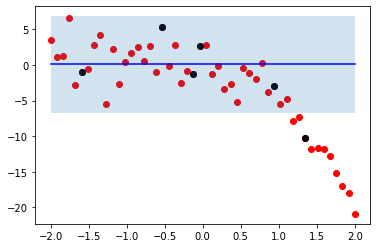

 40%|███▉      | 3969/10000 [00:18<00:26, 231.53it/s]

Mean loss at epoch 4000 : 3.035703659057617
 Validation loss after 4000 equals                     3.657926559448242


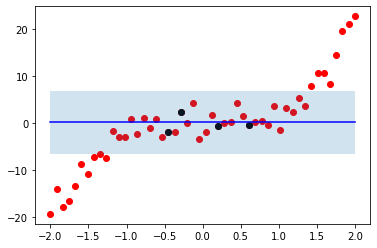

 41%|████      | 4073/10000 [00:19<00:22, 258.02it/s]

Mean loss at epoch 4100 : 2.901629686355591
 Validation loss after 4100 equals                     2.900331974029541


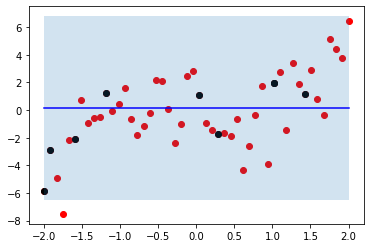

 42%|████▏     | 4169/10000 [00:19<00:25, 231.33it/s]

Mean loss at epoch 4200 : 3.142028570175171
 Validation loss after 4200 equals                     2.9325952529907227


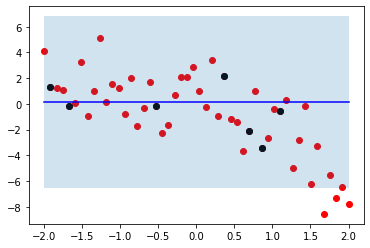

 43%|████▎     | 4270/10000 [00:20<00:22, 249.87it/s]

Mean loss at epoch 4300 : 3.024001121520996
 Validation loss after 4300 equals                     3.1658716201782227


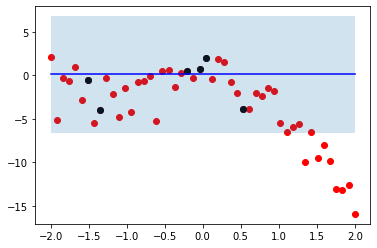

 44%|████▍     | 4395/10000 [00:20<00:21, 262.40it/s]

Mean loss at epoch 4400 : 2.918471097946167
 Validation loss after 4400 equals                     3.236367702484131


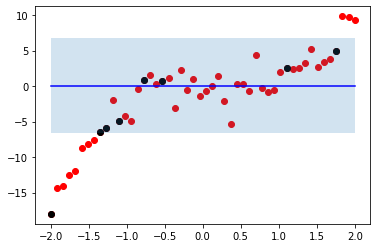

 45%|████▍     | 4491/10000 [00:21<00:22, 240.74it/s]

Mean loss at epoch 4500 : 3.0886969566345215
 Validation loss after 4500 equals                     3.481375217437744


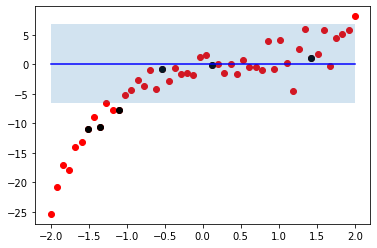

 46%|████▌     | 4583/10000 [00:21<00:23, 227.56it/s]

Mean loss at epoch 4600 : 2.911067008972168
 Validation loss after 4600 equals                     2.924379825592041


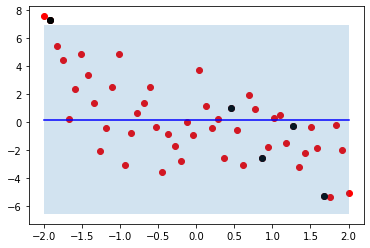

 47%|████▋     | 4680/10000 [00:22<00:22, 234.09it/s]

Mean loss at epoch 4700 : 3.461141347885132
 Validation loss after 4700 equals                     3.169722557067871


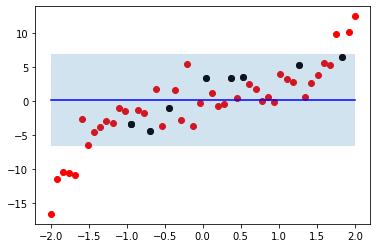

 48%|████▊     | 4779/10000 [00:22<00:21, 243.07it/s]

Mean loss at epoch 4800 : 3.2235524654388428
 Validation loss after 4800 equals                     3.61971378326416


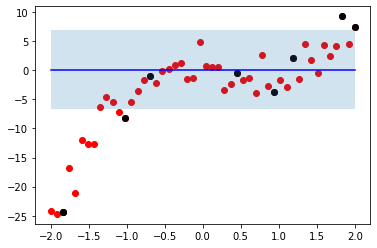

 49%|████▉     | 4882/10000 [00:22<00:20, 251.97it/s]

Mean loss at epoch 4900 : 3.8092684745788574
 Validation loss after 4900 equals                     2.956352949142456


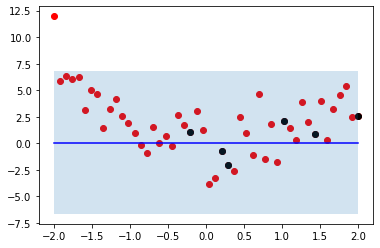

 50%|████▉     | 4987/10000 [00:23<00:19, 257.17it/s]

Mean loss at epoch 5000 : 4.167478084564209
 Validation loss after 5000 equals                     3.0895872116088867


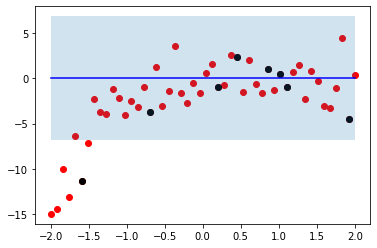

 51%|█████     | 5081/10000 [00:23<00:19, 246.28it/s]

Mean loss at epoch 5100 : 3.764432430267334
 Validation loss after 5100 equals                     2.9009461402893066


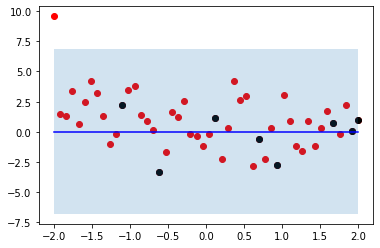

 52%|█████▏    | 5169/10000 [00:24<00:20, 231.60it/s]

Mean loss at epoch 5200 : 3.6011404991149902
 Validation loss after 5200 equals                     3.8029119968414307


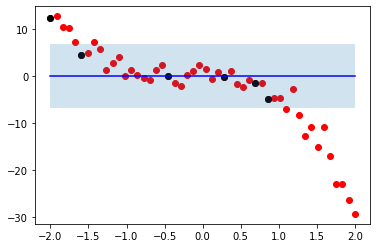

 53%|█████▎    | 5270/10000 [00:24<00:20, 234.27it/s]

Mean loss at epoch 5300 : 3.3446877002716064
 Validation loss after 5300 equals                     3.4269351959228516


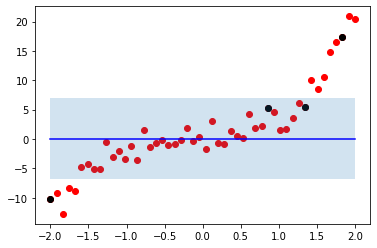

 54%|█████▎    | 5371/10000 [00:25<00:18, 251.96it/s]

Mean loss at epoch 5400 : 3.452284336090088
 Validation loss after 5400 equals                     3.464820623397827


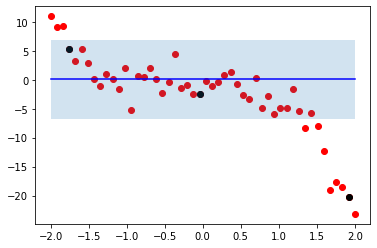

 55%|█████▍    | 5498/10000 [00:25<00:17, 264.18it/s]

Mean loss at epoch 5500 : 3.4002809524536133
 Validation loss after 5500 equals                     3.3364193439483643


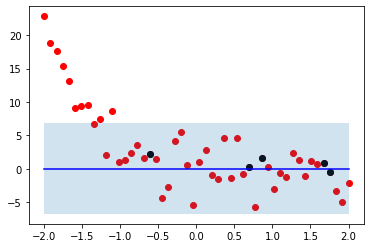

 56%|█████▌    | 5564/10000 [00:26<00:19, 227.38it/s]

Mean loss at epoch 5600 : 3.2757761478424072
 Validation loss after 5600 equals                     2.868931293487549


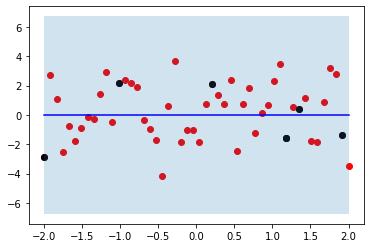

 57%|█████▋    | 5684/10000 [00:26<00:18, 234.13it/s]

Mean loss at epoch 5700 : 3.7274177074432373
 Validation loss after 5700 equals                     3.2805681228637695


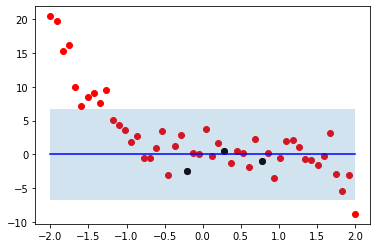

 58%|█████▊    | 5800/10000 [00:27<00:17, 235.46it/s]

Mean loss at epoch 5800 : 3.833695888519287
 Validation loss after 5800 equals                     2.951885938644409


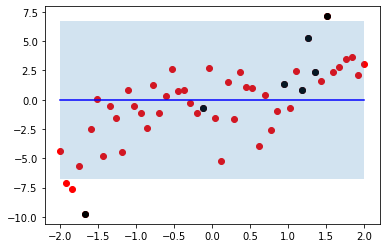

 59%|█████▉    | 5886/10000 [00:27<00:19, 209.41it/s]

Mean loss at epoch 5900 : 3.3165361881256104
 Validation loss after 5900 equals                     3.7387044429779053


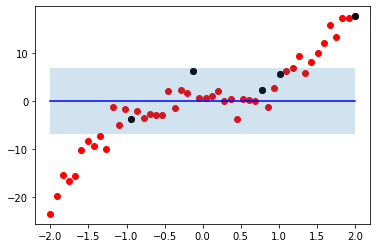

 60%|█████▉    | 5986/10000 [00:28<00:17, 232.69it/s]

Mean loss at epoch 6000 : 3.6366238594055176
 Validation loss after 6000 equals                     3.6368603706359863


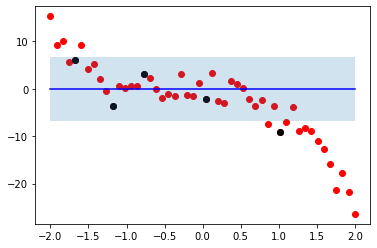

 61%|██████    | 6078/10000 [00:28<00:16, 235.80it/s]

Mean loss at epoch 6100 : 3.024318218231201
 Validation loss after 6100 equals                     3.436607599258423


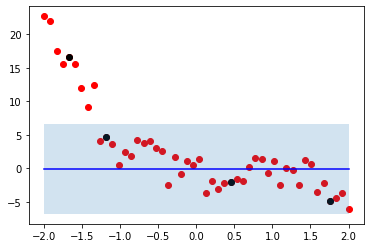

 62%|██████▏   | 6179/10000 [00:28<00:15, 247.03it/s]

Mean loss at epoch 6200 : 3.360690116882324
 Validation loss after 6200 equals                     3.792513132095337


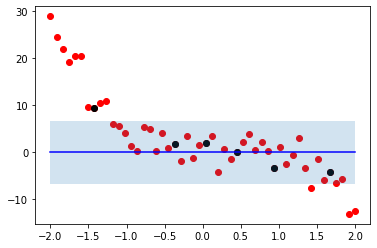

 63%|██████▎   | 6284/10000 [00:29<00:14, 258.68it/s]

Mean loss at epoch 6300 : 3.3759419918060303
 Validation loss after 6300 equals                     3.368396520614624


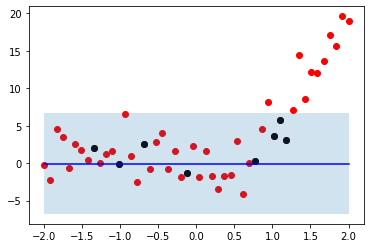

 64%|██████▍   | 6387/10000 [00:29<00:14, 257.06it/s]

Mean loss at epoch 6400 : 3.0999197959899902
 Validation loss after 6400 equals                     3.853893995285034


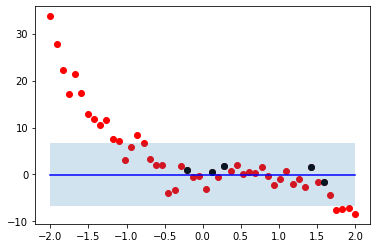

 65%|██████▍   | 6492/10000 [00:30<00:14, 249.19it/s]

Mean loss at epoch 6500 : 3.158337354660034
 Validation loss after 6500 equals                     3.2387943267822266


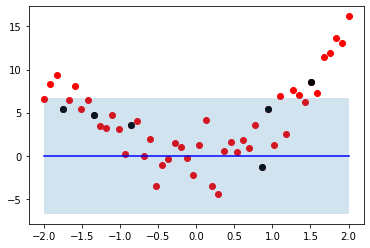

 66%|██████▌   | 6595/10000 [00:30<00:13, 256.53it/s]

Mean loss at epoch 6600 : 3.3115172386169434
 Validation loss after 6600 equals                     3.4770119190216064


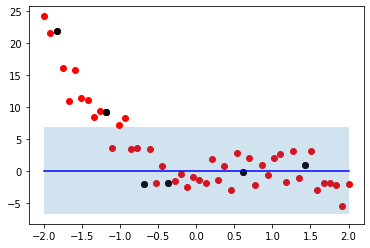

 67%|██████▋   | 6663/10000 [00:30<00:14, 232.66it/s]

Mean loss at epoch 6700 : 3.2247085571289062
 Validation loss after 6700 equals                     3.9718282222747803


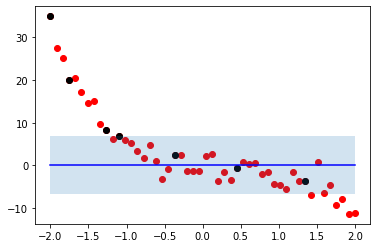

 68%|██████▊   | 6772/10000 [00:31<00:12, 264.06it/s]

Mean loss at epoch 6800 : 3.585448980331421
 Validation loss after 6800 equals                     3.014589548110962


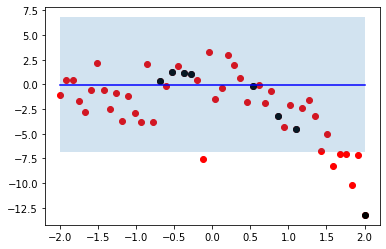

 69%|██████▉   | 6877/10000 [00:31<00:11, 263.71it/s]

Mean loss at epoch 6900 : 3.5867321491241455
 Validation loss after 6900 equals                     2.913191795349121


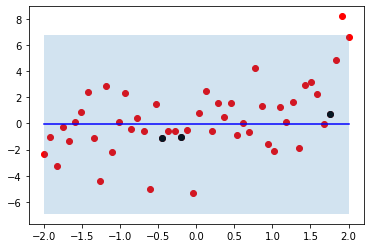

 70%|██████▉   | 6984/10000 [00:32<00:11, 269.68it/s]

Mean loss at epoch 7000 : 3.037519931793213
 Validation loss after 7000 equals                     3.678452968597412


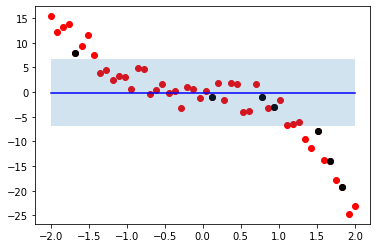

 71%|███████   | 7090/10000 [00:32<00:10, 266.88it/s]

Mean loss at epoch 7100 : 2.9419498443603516
 Validation loss after 7100 equals                     3.405618906021118


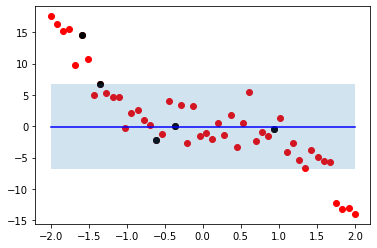

 72%|███████▏  | 7198/10000 [00:33<00:10, 271.10it/s]

Mean loss at epoch 7200 : 3.158677577972412
 Validation loss after 7200 equals                     2.867009162902832


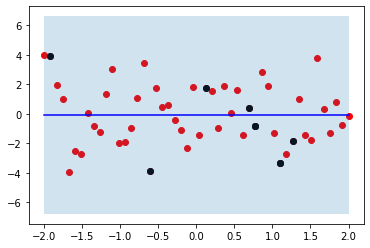

 73%|███████▎  | 7290/10000 [00:33<00:11, 234.03it/s]

Mean loss at epoch 7300 : 3.018599271774292
 Validation loss after 7300 equals                     3.323268175125122


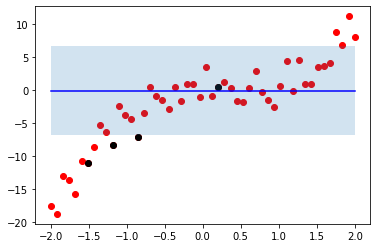

 74%|███████▍  | 7392/10000 [00:34<00:10, 245.04it/s]

Mean loss at epoch 7400 : 3.821404218673706
 Validation loss after 7400 equals                     3.361034870147705


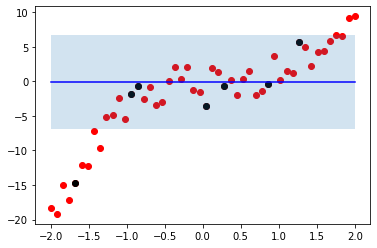

 75%|███████▍  | 7497/10000 [00:34<00:09, 259.89it/s]

Mean loss at epoch 7500 : 4.248965263366699
 Validation loss after 7500 equals                     3.4052252769470215


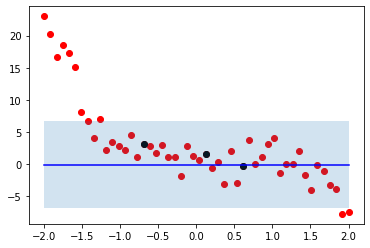

 76%|███████▌  | 7566/10000 [00:34<00:10, 236.75it/s]

Mean loss at epoch 7600 : 2.9636855125427246
 Validation loss after 7600 equals                     3.106241464614868


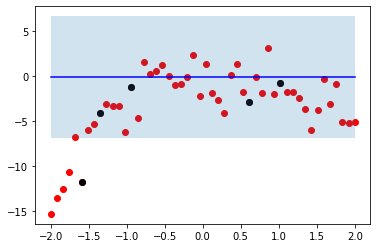

 77%|███████▋  | 7671/10000 [00:35<00:09, 245.65it/s]

Mean loss at epoch 7700 : 3.1390578746795654
 Validation loss after 7700 equals                     3.9597764015197754


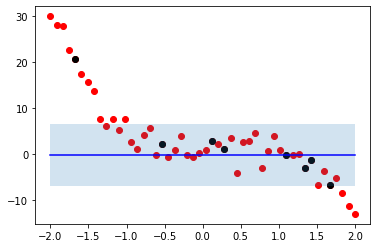

 78%|███████▊  | 7773/10000 [00:35<00:08, 260.95it/s]

Mean loss at epoch 7800 : 3.5808496475219727
 Validation loss after 7800 equals                     3.465266704559326


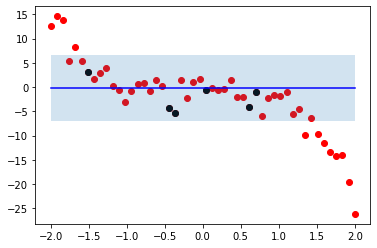

 79%|███████▉  | 7878/10000 [00:36<00:07, 266.24it/s]

Mean loss at epoch 7900 : 4.077383518218994
 Validation loss after 7900 equals                     3.495896100997925


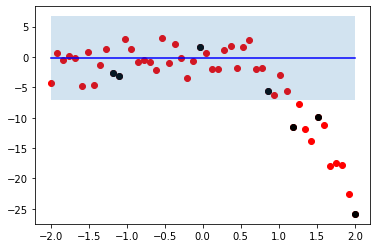

 80%|███████▉  | 7984/10000 [00:36<00:07, 267.60it/s]

Mean loss at epoch 8000 : 3.0415847301483154
 Validation loss after 8000 equals                     3.894404411315918


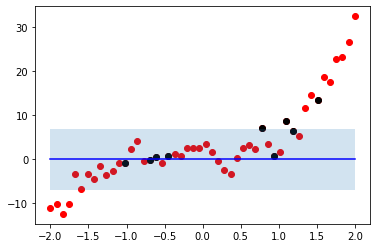

 81%|████████  | 8092/10000 [00:36<00:06, 272.70it/s]

Mean loss at epoch 8100 : 3.9572086334228516
 Validation loss after 8100 equals                     3.0210742950439453


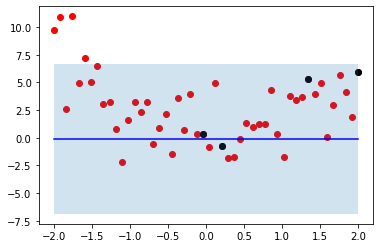

 82%|████████▏ | 8200/10000 [00:37<00:06, 269.93it/s]

Mean loss at epoch 8200 : 3.688425064086914
 Validation loss after 8200 equals                     3.102447748184204


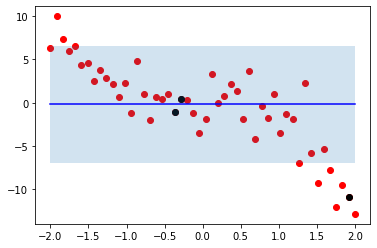

 83%|████████▎ | 8268/10000 [00:37<00:07, 241.28it/s]

Mean loss at epoch 8300 : 4.011943340301514
 Validation loss after 8300 equals                     3.131960391998291


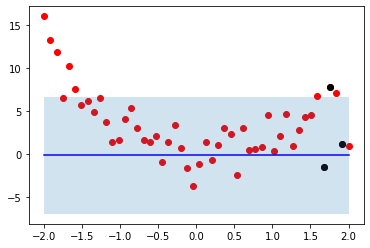

 84%|████████▎ | 8373/10000 [00:38<00:06, 265.23it/s]

Mean loss at epoch 8400 : 3.327059745788574
 Validation loss after 8400 equals                     3.8368418216705322


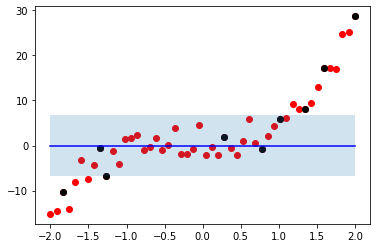

 85%|████████▍ | 8479/10000 [00:38<00:05, 270.96it/s]

Mean loss at epoch 8500 : 3.5755460262298584
 Validation loss after 8500 equals                     2.9060981273651123


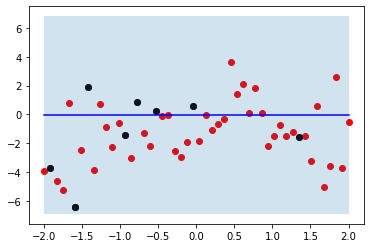

 86%|████████▌ | 8587/10000 [00:39<00:05, 273.31it/s]

Mean loss at epoch 8600 : 3.4642467498779297
 Validation loss after 8600 equals                     3.0097315311431885


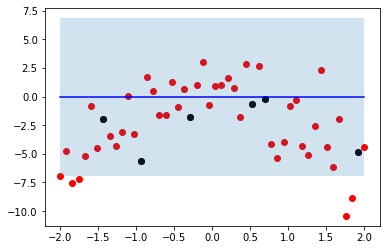

 87%|████████▋ | 8692/10000 [00:39<00:04, 268.09it/s]

Mean loss at epoch 8700 : 3.4245712757110596
 Validation loss after 8700 equals                     2.918809175491333


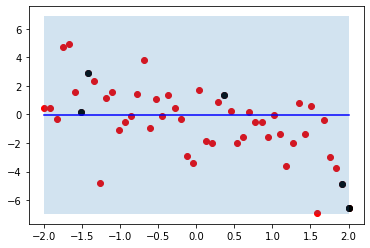

 88%|████████▊ | 8762/10000 [00:39<00:05, 236.31it/s]

Mean loss at epoch 8800 : 3.0898261070251465
 Validation loss after 8800 equals                     3.1115524768829346


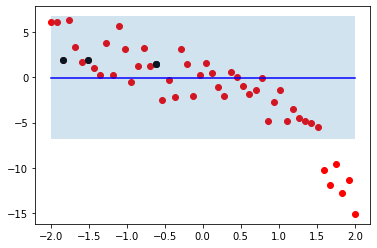

 89%|████████▊ | 8873/10000 [00:40<00:04, 253.18it/s]

Mean loss at epoch 8900 : 3.120584726333618
 Validation loss after 8900 equals                     3.1159451007843018


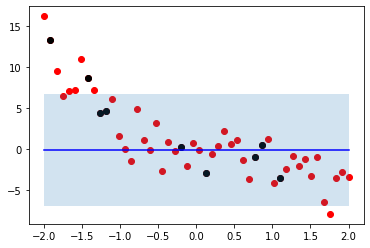

 90%|████████▉ | 8977/10000 [00:40<00:03, 263.25it/s]

Mean loss at epoch 9000 : 3.8122472763061523
 Validation loss after 9000 equals                     3.560067653656006


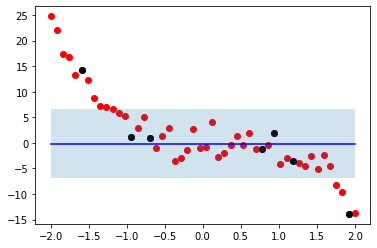

 91%|█████████ | 9081/10000 [00:41<00:03, 263.27it/s]

Mean loss at epoch 9100 : 3.939460515975952
 Validation loss after 9100 equals                     4.025005340576172


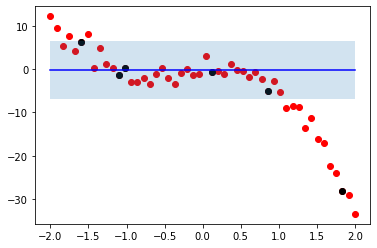

 92%|█████████▏| 9187/10000 [00:41<00:03, 267.07it/s]

Mean loss at epoch 9200 : 3.3362343311309814
 Validation loss after 9200 equals                     3.750708818435669


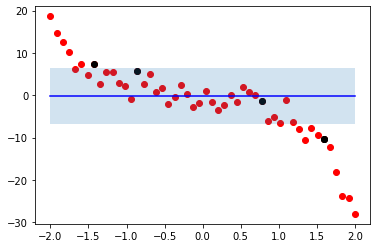

 93%|█████████▎| 9294/10000 [00:41<00:02, 270.23it/s]

Mean loss at epoch 9300 : 3.145944118499756
 Validation loss after 9300 equals                     3.517282485961914


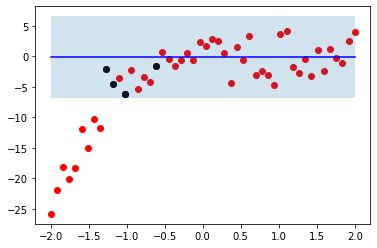

 94%|█████████▎| 9364/10000 [00:42<00:02, 240.09it/s]

Mean loss at epoch 9400 : 3.0159037113189697
 Validation loss after 9400 equals                     3.1550707817077637


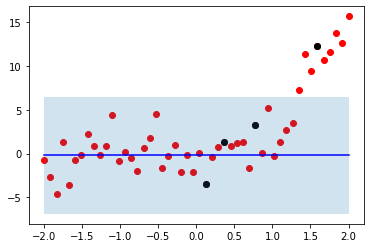

 95%|█████████▍| 9473/10000 [00:42<00:01, 265.26it/s]

Mean loss at epoch 9500 : 3.183488368988037
 Validation loss after 9500 equals                     2.9028472900390625


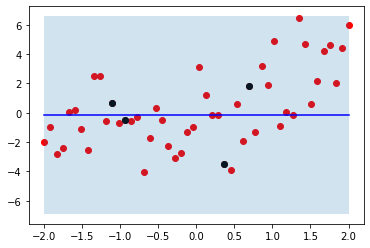

 96%|█████████▌| 9576/10000 [00:43<00:01, 266.41it/s]

Mean loss at epoch 9600 : 2.90907621383667
 Validation loss after 9600 equals                     2.8769426345825195


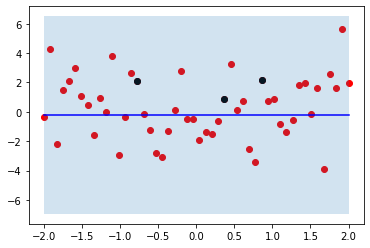

 97%|█████████▋| 9679/10000 [00:43<00:01, 261.73it/s]

Mean loss at epoch 9700 : 3.427896022796631
 Validation loss after 9700 equals                     3.84234619140625


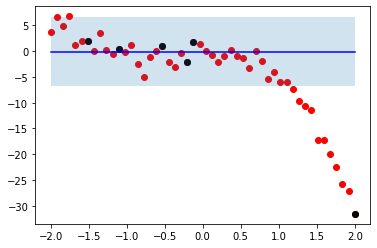

 98%|█████████▊| 9775/10000 [00:44<00:00, 237.11it/s]

Mean loss at epoch 9800 : 3.5839357376098633
 Validation loss after 9800 equals                     3.7056314945220947


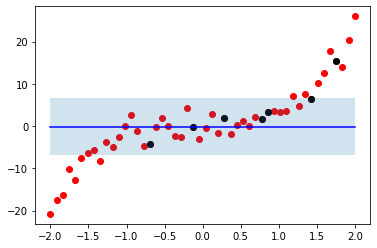

 99%|█████████▉| 9879/10000 [00:44<00:00, 199.85it/s]

Mean loss at epoch 9900 : 3.2065422534942627
 Validation loss after 9900 equals                     3.6502344608306885


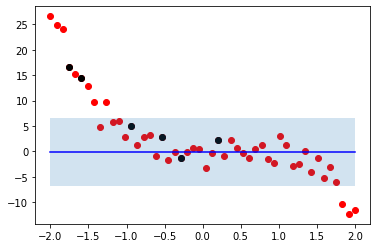

100%|██████████| 10000/10000 [00:45<00:00, 217.85it/s]


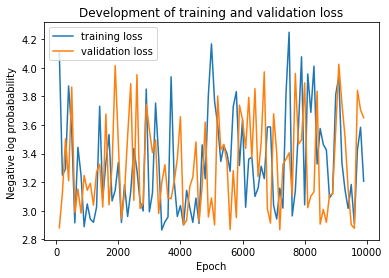

In [15]:
model_weights = trainer.run_training(**default_conf['multiple_functions']['training_params'])



In [72]:
list(trainer._cnp.encoder.parameters())

[Parameter containing:
 tensor([[ 0.2153,  0.2850],
         [-0.1618,  0.6099]], requires_grad=True),
 Parameter containing:
 tensor([-0.5447,  0.2440], requires_grad=True),
 Parameter containing:
 tensor([[ 0.2778, -0.2076],
         [ 0.6317, -0.2890]], requires_grad=True),
 Parameter containing:
 tensor([-0.0471, -0.4662], requires_grad=True),
 Parameter containing:
 tensor([[ 0.1934, -0.0725],
         [-0.6474,  0.0425]], requires_grad=True),
 Parameter containing:
 tensor([ 0.1307, -0.3898], requires_grad=True),
 Parameter containing:
 tensor([[-0.5546, -0.5499],
         [ 0.5831, -0.5290]], requires_grad=True),
 Parameter containing:
 tensor([-0.2915, -0.1124], requires_grad=True)]

In [23]:
default_conf['multiple_functions']['experiment_params']

{'datagenerator': 'cnp.datageneration.PolynomialRegression',
 'dim_observation': 50,
 'dimout': 2,
 'dimr': 128,
 'dimx': 1,
 'dimy': 1,
 'dropout': 0,
 'lr': 0.0001,
 'max_contx': 10,
 'max_funcs': 10,
 'min_contx': 3,
 'min_funcs': 2,
 'n_epochs': 10000,
 'num_layers_decoder': 3,
 'num_layers_encoder': 4,
 'num_neurons_decoder': 2,
 'num_neurons_encoder': 128,
 'print_after': 100,
 'range_x': [-2, 2],
 'train_on_gpu': False}

In [57]:
dir(trainer._cnp.encoder)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_buffers',
 '_dimr',
 '_dimx',
 '_dimy',
 '_forward_hooks',
 '_forward_pre_hooks',
 '_get_name',
 '_hidden_layers',
 '_layers',
 '_load_from_state_dict',
 '_load_state_dict_pre_hooks',
 '_modules',
 '_named_members',
 '_parameters',
 '_process_input',
 '_register_load_state_dict_pre_hook',
 '_register_state_dict_hook',
 '_replicate_for_data_parallel',
 '_save_to_state_dict',
 '_slow_forward',
 '_state_dict_hooks',
 '_version',
 'add_module',
 'apply',
 'buffers',
 'children',
 'cpu',
 'cuda',
 'double',
 'dump_patches',
 'eval',
 'extra_repr',
 

In [85]:
!pwd

/Users/frederik/Google Drive/University/UC3M/TFM/cnp_repo/neural-processes/architecture_improvement


In [16]:
np.random.seed(None)

NameError: name 'np' is not defined